In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

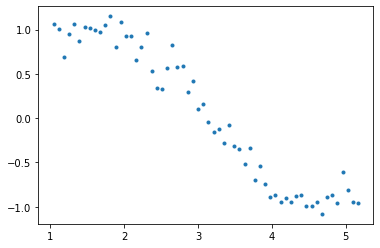

In [90]:
np.random.seed(10)
x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(curve['x'],curve['y'],'.')

In [102]:
train_X, test_X, train_y, test_y = train_test_split( curve.x,
                                                  curve.y,
                                                  test_size = 0.40,
                                                  random_state = 100 )

In [103]:
def fit_poly(degree):
    poly_coeff=np.polyfit(curve.x,curve.y,deg=degree)
    curve['fit']=np.polyval(poly_coeff,curve.x)
    sns.regplot(curve.x,curve.y,fit_reg=False)
    return plt.plot(curve.x,curve.fit,label='fit')

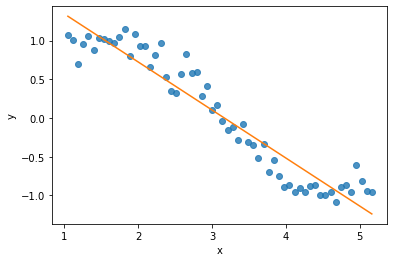

In [104]:
fit_poly(1)

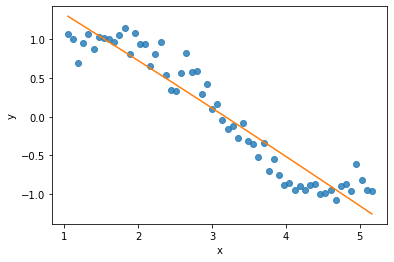

In [105]:
fit_poly(2)

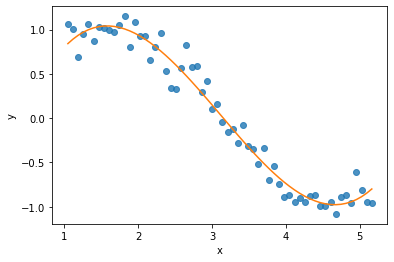

In [106]:
fit_poly(3)

In [107]:
def get_rmse( y, y_fit ):
    return np.sqrt( mean_squared_error( y, y_fit ) )

In [108]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

for i in range( 1, 15 ):
    p = np.polyfit( train_X, train_y, deg = i )
    rmse_df.loc[i-1] = [ i,
                      get_rmse( train_y, np.polyval( p, train_X ) ),
                      get_rmse( test_y, np.polyval( p, test_X ) ) ]

In [109]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,0.231569,0.237707
1,2.0,0.229154,0.244414
2,3.0,0.115409,0.165920
3,4.0,0.113938,0.164451
4,5.0,0.110525,0.159416
5,6.0,0.105360,0.166479
6,7.0,0.104923,0.161330
7,8.0,0.104414,0.157364
8,9.0,0.100549,0.160113
9,10.0,0.100393,0.158239


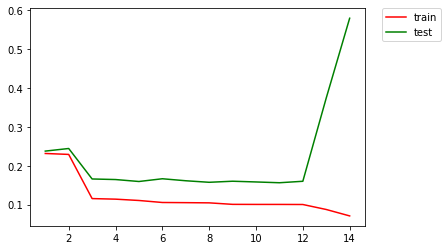

In [110]:
plt.plot( rmse_df.degree,
       rmse_df.rmse_train,
       label='train',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.rmse_test,
       label='test',
       color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),
         loc=2,
         borderaxespad=0.)

In [114]:
rmsett=rmse_df.rmse_train + rmse_df.rmse_test

In [129]:
optimum_degree=rmse_df.iloc[(np.argsort(rmsett)).argmin(),:].degree

c:\users\sudhe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


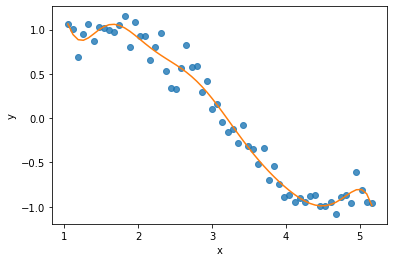

In [130]:
fit_poly(optimum_degree)